In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

seed = 1234
np.random.seed(seed)

**Load dataset**

In [2]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')

#Split X_train into X_train(75%) and X_val(25%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=seed, shuffle=True)

**Validation and Training error with varying values of k**

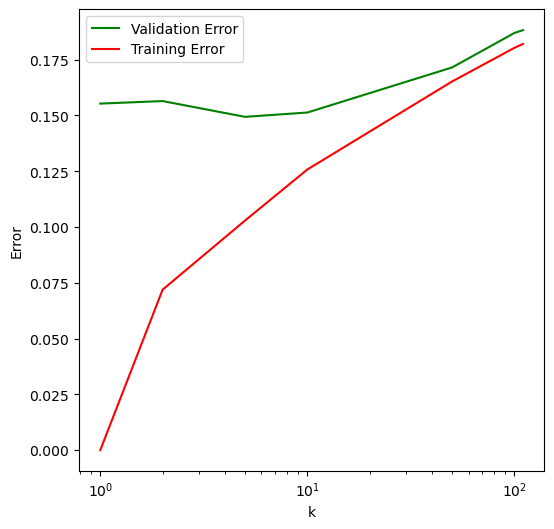

In [3]:
figure, axes = plt.subplots(1, figsize=(6, 6))

k = [1, 2, 5, 10, 50, 100, 110]
tr_error = []
v_error = []
for i in k:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    tr_error.append(1 - accuracy_score(y_train, neigh.predict(X_train)))
    v_error.append(1 - accuracy_score(y_val, neigh.predict(X_val)))
axes.plot(k, v_error, color="green", label='Validation Error')
axes.plot(k, tr_error, color="red", label='Training Error')
axes.legend()
axes.set_xlabel("k")
axes.set_ylabel("Error")
axes.set_xscale("log")

Based on this set of k values, k = 5 yields the lowest error on the validation set. However, I would like to further investigate the smaller values of k (1-10) since anything greater than k = 10 seems to have a higher error for both validation and testing sets.

**Validation and Training error with k values 1-10**

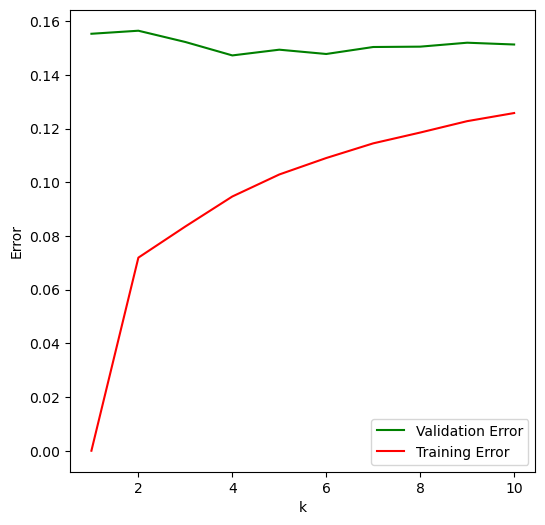

In [4]:
figure, axes = plt.subplots(1, figsize=(6, 6))

k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
tr_error = []
v_error = []
for i in k:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    tr_error.append(1 - accuracy_score(y_train, neigh.predict(X_train)))
    v_error.append(1 - accuracy_score(y_val, neigh.predict(X_val)))
axes.plot(k, v_error, color="green", label='Validation Error')
axes.plot(k, tr_error, color="red", label='Training Error')
axes.set_xlabel("k")
axes.set_ylabel("Error")
axes.legend()

We see now that k = 4 and k = 6 actually have the lowest error on the validation set, whereas error on the training set strictly increases as we increase k. Therefore I will use k = 4 for the final classifier on the testing set.

**k = 4 and k = 6 Accuracy Score**

In [5]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)
print("k=4 Training Accuracy:", accuracy_score(y_train, neigh.predict(X_train)))
print("k=4 Validation Accuracy:", accuracy_score(y_val, neigh.predict(X_val)))
print()
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train, y_train)
print("k=6 Training Accuracy:", accuracy_score(y_train, neigh.predict(X_train)))
print("k=6 Validation Accuracy:", accuracy_score(y_val, neigh.predict(X_val)))

k=4 Training Accuracy: 0.9052888888888889
k=4 Validation Accuracy: 0.8527333333333333

k=6 Training Accuracy: 0.8909555555555555
k=6 Validation Accuracy: 0.8522


**k = 4 Classifier on Testing Set**

In [6]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)
print("k=4 Testing Accuracy:", accuracy_score(y_test, neigh.predict(X_test)))

k=4 Testing Accuracy: 0.8473


Took about 9000 ms to train and predict.